In [18]:
%matplotlib inline
import GEOparse
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklego.linear_model import LowessRegression
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import random

In [2]:
from Scripts.Utils.datasets import get_datasets_intersections, get_dataset

In [266]:
data1, data2, data3, data4 = get_datasets_intersections(["Asakura2020_adjusted", "Fehlmann2020_cleaned", "Patnaik2017_adjusted", "Leidinger2011_adju"], False)
data = pd.concat([data1, data2])
data.head()

,UGAGGGGCAGAGAGCGAGACUUU,UGGGGAGCUGAGGCUCUGGGGGUG,AACAUUCAUUGCUGUCGGUGGGU,UAGCACCAUUUGAAAUCGGUUA,AAACAUUCGCGGUGCACUUCUU,UCCAUUACACUACCCUGCCUCU,CAGCAGCAAUUCAUGUUUUGAA,CACGCUCAUGCACACACCCACA,GUUCUCCCAACGUAAGCCCAGC,CCUCCCACACCCAAGGCUUGCA,...,UAUGUCUGCUGACCAUCACCUU,ACUCCAGCCCCACAGCCUCAGC,UGUAAACAUCCUACACUCUCAGC,CUCCUAUAUGAUGCCUUUCUUC,AACACACCUGGUUAACCUCUUU,UUAUAAUACAACCUGAUAAGUG,ACCUGGCAUACAAUGUAGAUUU,AGUUCUUCAGUGGCAAGCUUUA,UGUGACUGGUUGACCAGAGGGG,cancer
0,-0.406487,-1.129678,-0.077225,0.629160,0.125911,1.427307,0.594132,0.121712,1.362771,0.157187,...,-0.028713,0.041266,-0.572796,-0.446543,1.226687,-0.077784,0.523368,-0.509143,-2.469032,0
1,0.057833,-1.753213,-0.414948,0.492357,-0.229687,0.555592,-0.319770,-0.311054,0.651254,-0.073554,...,2.464996,0.439629,-0.920892,0.456750,-0.648622,-0.426571,0.178341,0.836105,0.433553,0
2,-0.252769,-0.857181,1.096326,-0.002810,-0.825554,1.016758,0.611129,-0.093615,0.744637,-0.256053,...,0.634750,0.278376,0.558437,0.445583,1.285241,-0.010125,1.408516,0.650540,0.392271,0
3,-0.150414,-0.234860,0.095416,1.157437,0.307410,0.985225,0.441718,-0.084744,0.091435,0.874967,...,1.201153,-0.337047,1.166045,-0.207992,-0.157249,0.102610,0.677184,-0.286879,1.464014,0
4,0.512830,-2.481216,0.290424,-0.063500,0.513414,-0.890072,1.818924,-2.457861,1.789221,1.042852,...,0.333918,-2.415736,2.187127,2.283632,1.302150,0.298955,0.930748,1.657439,1.818411,0


In [267]:
data2

,UGAGGGGCAGAGAGCGAGACUUU,UGGGGAGCUGAGGCUCUGGGGGUG,AACAUUCAUUGCUGUCGGUGGGU,UAGCACCAUUUGAAAUCGGUUA,AAACAUUCGCGGUGCACUUCUU,UCCAUUACACUACCCUGCCUCU,CAGCAGCAAUUCAUGUUUUGAA,CACGCUCAUGCACACACCCACA,GUUCUCCCAACGUAAGCCCAGC,CCUCCCACACCCAAGGCUUGCA,...,UAUGUCUGCUGACCAUCACCUU,ACUCCAGCCCCACAGCCUCAGC,UGUAAACAUCCUACACUCUCAGC,CUCCUAUAUGAUGCCUUUCUUC,AACACACCUGGUUAACCUCUUU,UUAUAAUACAACCUGAUAAGUG,ACCUGGCAUACAAUGUAGAUUU,AGUUCUUCAGUGGCAAGCUUUA,UGUGACUGGUUGACCAGAGGGG,cancer
0,-2.040768,-1.348924,-2.058401,-1.480281,-1.312153,-1.417381,-1.082980,-2.149454,-1.658360,-1.600254,...,-1.418888,-1.883938,-1.155293,-1.335219,-1.314774,-0.653205,-1.061447,-1.631901,-1.055447,False
1,0.716875,-0.029857,1.410054,0.949295,-1.010132,-0.393193,0.087037,1.046654,1.335692,1.040095,...,-0.689622,0.980659,1.237839,-0.718012,-0.834747,0.352191,-0.600254,0.820678,-0.495299,False
2,0.908973,0.024423,-0.361741,0.307408,1.226341,0.522680,0.886264,0.851508,0.969573,1.107011,...,1.399751,1.338192,1.108565,1.445379,1.045489,1.139436,1.009058,1.151084,-0.767702,False
3,0.140533,1.010694,0.004101,1.010141,-0.490408,-0.329545,1.674852,-0.146983,-1.071207,-0.040456,...,0.174348,-0.569061,0.130858,-0.326138,-0.256321,1.834882,0.736532,0.606175,0.143066,False
4,1.273212,1.348488,0.733095,1.116532,-0.249488,1.080361,0.520564,1.224675,1.568135,1.252932,...,-0.452116,0.966739,0.981431,-0.124704,-0.065880,0.777511,0.445914,1.599803,0.618350,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,-1.009393,-0.764093,-0.626105,0.125508,-0.831352,-1.068027,-0.336131,-1.090827,-0.957771,-1.119515,...,-0.828942,-0.989148,-1.005208,-0.810992,-0.892611,0.297316,-0.481965,-0.895986,-0.487543,True
1566,1.076336,-0.831582,0.033432,-1.011015,-0.657919,-0.670507,-1.299863,0.616450,0.101104,1.073326,...,-1.380158,1.098131,-1.196566,-1.036681,-0.925962,-1.709361,-0.856794,-1.259875,-0.600145,True
1567,0.384748,0.186370,1.059799,-0.089164,0.008370,-1.029110,-0.130819,0.309228,0.756205,0.839095,...,-0.558069,0.993853,0.877503,-0.505969,-0.539542,-0.270351,-0.360721,0.656253,-0.911205,True
1568,0.621559,1.478145,-0.195690,1.288947,0.207326,-0.628413,0.998539,0.705871,0.480839,0.471349,...,0.694971,0.089667,0.513926,-0.098899,0.342014,0.418668,-0.569437,0.943951,0.460293,True


In [268]:
data1.head()

,UGAGGGGCAGAGAGCGAGACUUU,UGGGGAGCUGAGGCUCUGGGGGUG,AACAUUCAUUGCUGUCGGUGGGU,UAGCACCAUUUGAAAUCGGUUA,AAACAUUCGCGGUGCACUUCUU,UCCAUUACACUACCCUGCCUCU,CAGCAGCAAUUCAUGUUUUGAA,CACGCUCAUGCACACACCCACA,GUUCUCCCAACGUAAGCCCAGC,CCUCCCACACCCAAGGCUUGCA,...,UAUGUCUGCUGACCAUCACCUU,ACUCCAGCCCCACAGCCUCAGC,UGUAAACAUCCUACACUCUCAGC,CUCCUAUAUGAUGCCUUUCUUC,AACACACCUGGUUAACCUCUUU,UUAUAAUACAACCUGAUAAGUG,ACCUGGCAUACAAUGUAGAUUU,AGUUCUUCAGUGGCAAGCUUUA,UGUGACUGGUUGACCAGAGGGG,cancer
0,-0.406487,-1.129678,-0.077225,0.629160,0.125911,1.427307,0.594132,0.121712,1.362771,0.157187,...,-0.028713,0.041266,-0.572796,-0.446543,1.226687,-0.077784,0.523368,-0.509143,-2.469032,0
1,0.057833,-1.753213,-0.414948,0.492357,-0.229687,0.555592,-0.319770,-0.311054,0.651254,-0.073554,...,2.464996,0.439629,-0.920892,0.456750,-0.648622,-0.426571,0.178341,0.836105,0.433553,0
2,-0.252769,-0.857181,1.096326,-0.002810,-0.825554,1.016758,0.611129,-0.093615,0.744637,-0.256053,...,0.634750,0.278376,0.558437,0.445583,1.285241,-0.010125,1.408516,0.650540,0.392271,0
3,-0.150414,-0.234860,0.095416,1.157437,0.307410,0.985225,0.441718,-0.084744,0.091435,0.874967,...,1.201153,-0.337047,1.166045,-0.207992,-0.157249,0.102610,0.677184,-0.286879,1.464014,0
4,0.512830,-2.481216,0.290424,-0.063500,0.513414,-0.890072,1.818924,-2.457861,1.789221,1.042852,...,0.333918,-2.415736,2.187127,2.283632,1.302150,0.298955,0.930748,1.657439,1.818411,0


In [269]:
def plot_pca(data1, data2, base=None):
    pca = PCA(n_components=2)
    if base is None:
        base = pd.concat([data1, data2])
    pca = pca.fit(base.iloc[:, :-1])
    components1 = pca.transform(data1.iloc[:, :-1])
    components2 = pca.transform(data2.iloc[:, :-1])
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = ['Asakura controls', 'Asakura case', 'Fehlmann controls', 'Fehlmann case']
    colors = ['r', 'g', 'b', 'y']
    ax.scatter(components1[data1["cancer"] == 0, 0], components1[data1["cancer"] == 0, 1], c = 'g', s = 10)
    ax.scatter(components1[data1["cancer"] == 1, 0], components1[data1["cancer"] == 1, 1], c = 'r', s = 10)
    ax.scatter(components2[data2["cancer"] == 0, 0], components2[data2["cancer"] == 0, 1], c = 'b', s = 10)
    ax.scatter(components2[data2["cancer"] == 1, 0], components2[data2["cancer"] == 1, 1], c = 'y', s = 10)
    ax.legend(targets)
    ax.grid()
    plt.show()

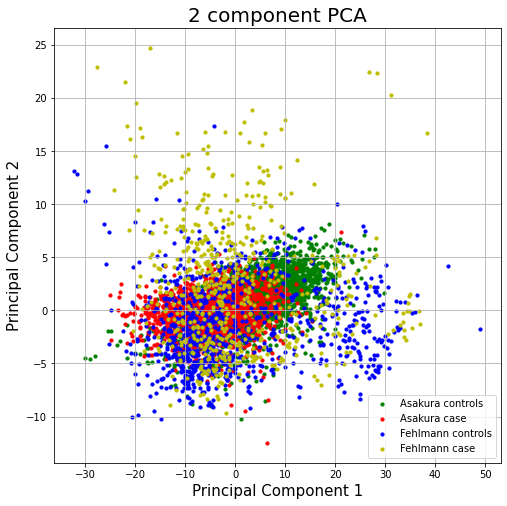

In [270]:
plot_pca(data1, data2, base=data2)

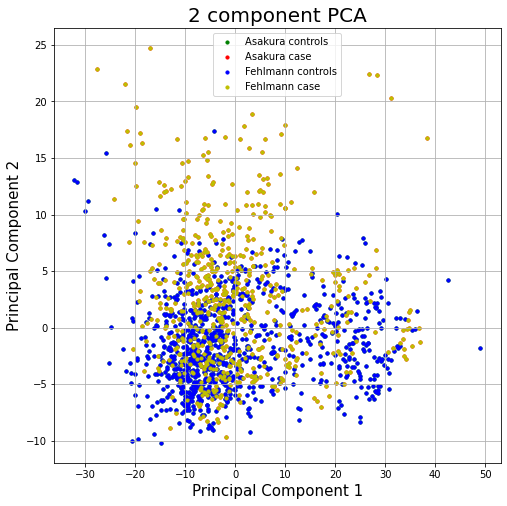

In [271]:
plot_pca(data2, data2, data2)

### Logistic regression

In [272]:
#data1, data2 = get_datasets_intersections(["Asakura2020_adjusted", "Fehlmann2020_cleaned"])

In [274]:
model = LogisticRegression()
model.fit(pd.concat([data1.iloc[:, :-1], data2.iloc[:, :-1]]), pd.concat([data1["cancer"], data2["cancer"]]))

LogisticRegression()

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


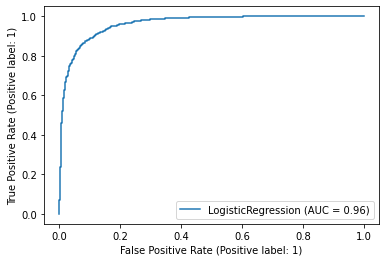

In [278]:
plot_roc_curve(model, data1.iloc[:, :-1], data1["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


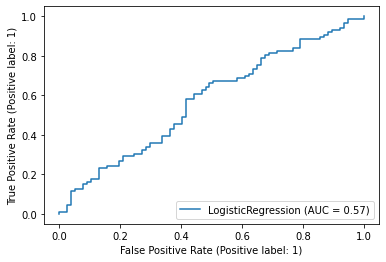

In [276]:
plot_roc_curve(model, data3.iloc[:, :-1], data3["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


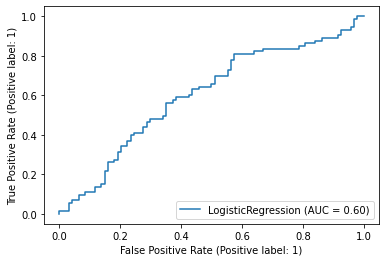

In [277]:
plot_roc_curve(model, data4.iloc[:, :-1], data4["cancer"])

In [318]:
model1, model2, model3 = [LogisticRegression(max_iter=1000) for i in range(3)]
model1.fit(data1.iloc[:, :-1], data1["cancer"])
model2.fit(data2.iloc[:, :-1], data2["cancer"])
model3.fit(data4.iloc[:, :-1], data4["cancer"])

LogisticRegression(max_iter=1000)

In [319]:
predictions = model1.predict_proba(data3.iloc[:, :-1])[:, 1] + model2.predict_proba(data3.iloc[:, :-1])[:, 1] + model3.predict_proba(data3.iloc[:, :-1])[:, 1]

In [315]:
from sklearn.metrics import RocCurveDisplay

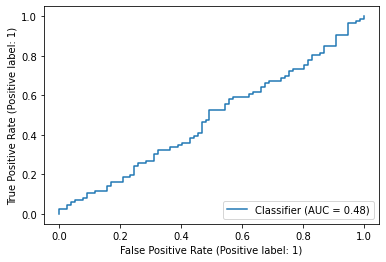

In [320]:
RocCurveDisplay.from_predictions(data3["cancer"], predictions)

array([0, 3, 1, ..., 1, 2, 1], dtype=int64)

In [296]:
model = LogisticRegression(max_iter=1000)
model.fit(pd.concat([data1.iloc[:, :-1], data4.iloc[:, :-1], data3.iloc[:, :-1]]), pd.concat([data1["cancer"], data4["cancer"], data3["cancer"]]))

LogisticRegression(max_iter=1000)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


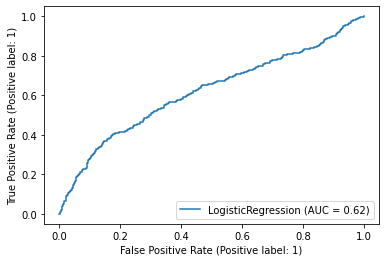

In [297]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


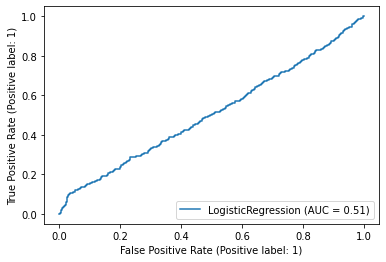

In [288]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


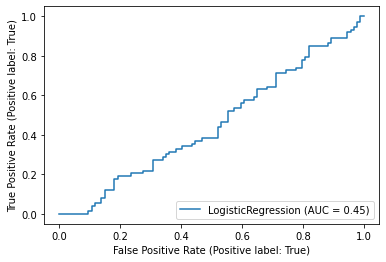

In [92]:
plot_roc_curve(model, data4.iloc[:, :-1], data4["cancer"])

In [93]:
model = LogisticRegression(class_weight="balanced")
model.fit(data3.iloc[:, :-1], data3["cancer"])

LogisticRegression(class_weight='balanced')

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


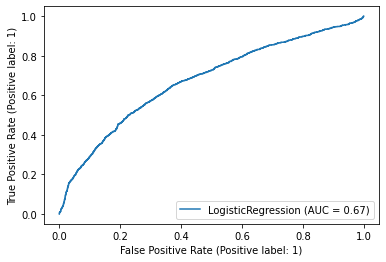

In [94]:
plot_roc_curve(model, data1.iloc[:, :-1], data1["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


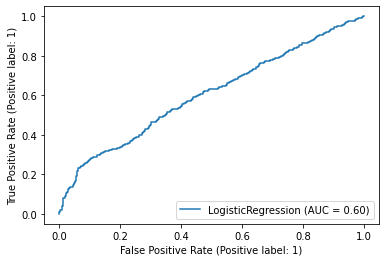

In [95]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


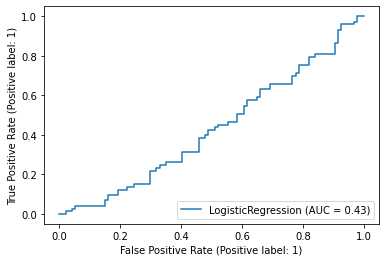

In [96]:
plot_roc_curve(model, data4.iloc[:, :-1], data4["cancer"])

In [109]:
data1, data4 = get_datasets_intersections(["Asakura2020_adjusted", "Keller2014"], True)

In [110]:
model = LogisticRegression(class_weight="balanced")
model.fit(data4.iloc[:, :-1], data4["cancer"])

LogisticRegression(class_weight='balanced')

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


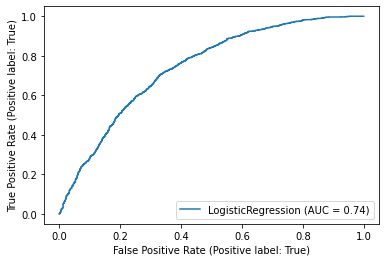

In [111]:
plot_roc_curve(model, data1.iloc[:, :-1], data1["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


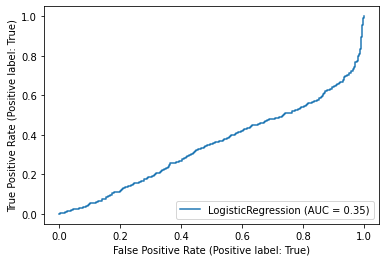

In [100]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


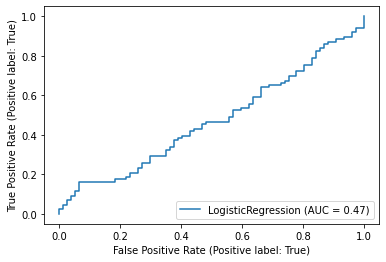

In [101]:
plot_roc_curve(model, data3.iloc[:, :-1], data3["cancer"])

In [118]:
RocCurveDisplay.from_predictions(data2["cancer"], -data2["UGAGGUAGUAGGUUGUAUAGUU"])

NameError: name 'RocCurveDisplay' is not defined

In [28]:
data_a = get_dataset("Asakura2020")

In [43]:
vals = [roc_auc_score(data_a["cancer"], data_a[c]) for c in data_a.columns[:20]]

In [44]:
vals = [abs(v-0.5) + 0.5 for v in vals]

In [46]:
np.max(vals)

0.8964520241464946

In [179]:
data1, data2, data3, data4 = get_datasets_intersections(["Keller2014", "Bianchi2011", "Bianchi2011_cleaned", "Bianchi2011_adjusted"], True)

In [180]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data1.iloc[:, :-1], data1["cancer"])

LogisticRegression(max_iter=1000)

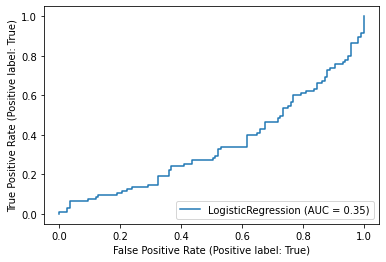

In [181]:
RocCurveDisplay.from_estimator(logreg, data2.iloc[:,:-1], data2["cancer"])

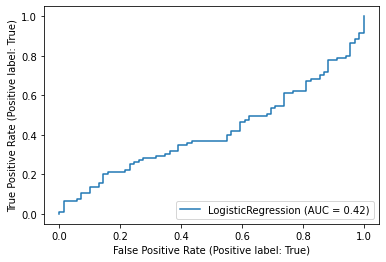

In [182]:
RocCurveDisplay.from_estimator(logreg, data3.iloc[:,:-1], data3["cancer"])

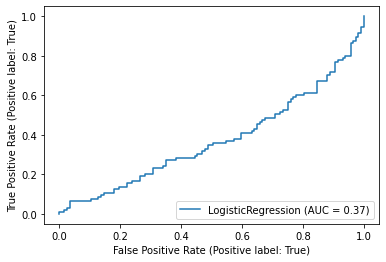

In [183]:
RocCurveDisplay.from_estimator(logreg, data4.iloc[:,:-1], data4["cancer"])

In [170]:
data3

,UCAGUGCAUCACAGAACUUUGU,UCGUACCGUGAGUAAUAAUGCG,AGCAGCAUUGUACAGGGCUAUGA,CAUAAAGUAGAAAGCACUACU,UGUAAACAUCCUACACUCAGCU,UAGCACCAUCUGAAAUCGGUUA,CAACGGAAUCCCAAAAGCAGCUG,UCAGUGCACUACAGAACUUUGU,CAAAGUGCUUACAGUGCAGGUAG,AAGCUGCCAGUUGAAGAACUGU,...,GCCCCUGGGCCUAUCCUAGAA,AUCAUAGAGGAAAAUCCACGU,CUGGCCCUCUCUGCCCUUCCGU,AAGGAGCUCACAGUCUAUUGAG,UCUACAGUGCACGUGUCUCCAGU,UGUAAACAUCCUACACUCUCAGC,UUCAAGUAAUUCAGGAUAGGU,UUAUAAUACAACCUGAUAAGUG,UCUUGGAGUAGGUCAUUGGGUGG,cancer
0,-1.616441,0.484641,-0.045867,-1.239751,0.178995,-1.198819,0.472292,-0.173071,0.759750,0.116655,...,0.460096,0.110229,-0.601585,-0.045186,1.013648,0.697663,0.929684,0.155732,-0.720290,False
1,-2.147324,0.842050,0.323174,-1.020246,0.648568,-0.365665,0.894065,-1.245626,1.368321,0.177647,...,1.314864,-1.621114,-0.847416,0.841994,1.860136,0.887928,0.666707,0.383195,-0.827435,False
2,-0.651243,0.235224,-1.631161,-0.938916,0.604523,0.410121,-0.119894,-0.296224,-0.290356,0.734802,...,0.700896,0.761762,-0.248044,-0.758279,0.436430,0.804398,0.316664,0.223467,-0.833289,False
3,-0.274209,-0.145124,-0.621421,-0.214090,-1.733373,0.806299,-0.146610,-0.124800,-1.588186,-0.090183,...,-0.149151,-1.319976,-0.588900,-1.124918,-2.096296,-0.996063,-0.331673,-0.351997,-1.155264,False
4,1.480278,1.999975,0.638999,0.506709,0.833313,-0.191794,-0.464663,0.017455,0.667482,0.152680,...,-1.181065,2.075609,-0.176173,0.259281,-0.071443,-0.412316,0.272748,2.073924,-0.952564,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.207357,0.067388,0.369777,0.631265,0.117159,0.261129,-0.965409,1.121679,-0.779329,0.419680,...,0.076133,1.592106,-0.248900,-0.189448,0.165148,-0.633842,-0.801550,0.286717,0.373018,True
160,-0.775193,0.212524,0.431290,0.151984,-0.522116,-0.953899,-0.660591,-0.642170,0.647033,-0.932933,...,0.680117,-1.544012,0.253703,-0.063476,0.984297,0.244756,0.113805,0.400760,1.134801,True
161,-0.500098,-1.500931,-1.993714,-0.408356,-1.352353,-0.892787,-1.280652,-1.060198,-0.187039,-1.062499,...,-0.085983,-1.421922,0.544486,-0.211104,0.686923,-0.743644,-1.210531,-0.693008,0.763772,True
162,-0.788709,-1.225001,-0.641016,0.306596,-2.782296,-0.281401,-1.307027,-0.741593,-3.883438,0.268048,...,-0.892973,-1.469137,-0.326626,-0.814746,0.411727,-2.047735,-0.169325,0.256367,-0.754478,True


In [190]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data3.iloc[:, :-1], data3["cancer"])

LogisticRegression(max_iter=1000)

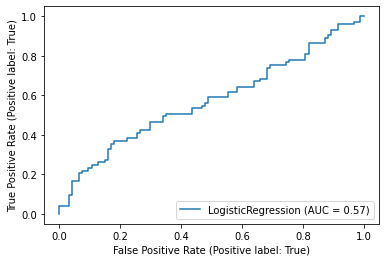

In [191]:
RocCurveDisplay.from_estimator(logreg, data1.iloc[:,:-1], data1["cancer"])

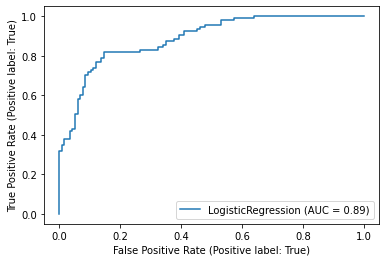

In [146]:
RocCurveDisplay.from_estimator(logreg, data4.iloc[:,:-1], data4["cancer"])

In [239]:
data1, data2, data3 = get_datasets_intersections(["Li2017", "Boeri2011", "Boeri2011_adjusted"], True)

In [240]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data1.iloc[:, :-1], data1["cancer"])

LogisticRegression(max_iter=1000)

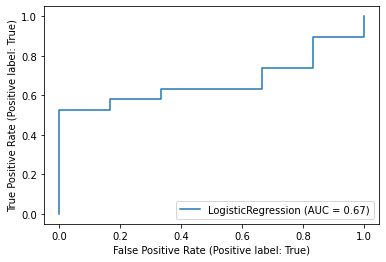

In [241]:
RocCurveDisplay.from_estimator(logreg, data3.iloc[:,:-1], data3["cancer"])

In [242]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data2.iloc[:, :-1], data2["cancer"])

LogisticRegression(max_iter=1000)

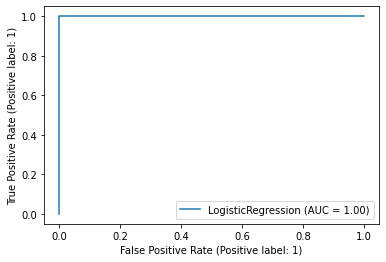

In [243]:
RocCurveDisplay.from_estimator(logreg, data1.iloc[:,:-1], data1["cancer"])

In [465]:
data1, data2 = get_datasets_intersections(["Jin2017", "Bianchi2011"], True)

In [466]:
data2.head()

,UGUAAACAUCCUACACUCAGCU,UCGUACCGUGAGUAAUAAUGCG,CAAAGUGCUUACAGUGCAGGUAG,UCUACAGUGCACGUGUCUCCAGU,CUGGCCCUCUCUGCCCUUCCGU,CAACGGAAUCCCAAAAGCAGCUG,UCUUGGAGUAGGUCAUUGGGUGG,AAGCUGCCAGUUGAAGAACUGU,UGUAAACAUCCUACACUCUCAGC,UCUCACACAGAAAUCGCACCCGU,UUCAAGUAAUUCAGGAUAGGU,UUCAAGUAAUCCAGGAUAGGCU,UCAGUGCAUCACAGAACUUUGU,UCAGUGCACUACAGAACUUUGU,UAGCACCAUCUGAAAUCGGUUA,AAGGAGCUCACAGUCUAUUGAG,cancer
0,0.430518,-1.383285,-1.533459,-0.205114,-0.501386,1.129804,1.399884,0.377011,0.025040,0.884551,0.458861,0.664833,-1.061261,0.060151,1.341187,-1.185820,False
1,0.560098,1.550921,0.533638,0.419912,-0.210510,0.758327,1.056918,0.237413,0.163115,-0.423848,1.113358,1.460662,-0.135923,-0.578570,-0.919354,-0.079079,False
2,0.735258,-0.344387,0.288289,0.848335,0.277343,0.071051,-0.502049,0.606056,0.353918,-2.278963,0.095769,0.009345,-0.930327,-0.416299,0.025618,1.097172,False
3,0.551748,1.014969,0.643007,0.939530,0.442911,-0.009999,0.353091,0.416869,0.757269,0.442502,0.407714,0.893022,-1.388380,0.187241,-0.313501,0.639138,False
4,-1.022306,-1.755820,0.189494,-0.171618,-0.201605,-1.176813,-1.124890,-0.964450,0.245434,0.100470,-0.205114,-0.638624,-0.681318,-0.504356,-0.673526,0.584445,False


In [467]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data1.iloc[:, :-1], data1["cancer"])

LogisticRegression(max_iter=1000)

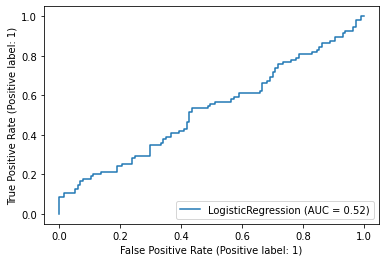

In [468]:
RocCurveDisplay.from_estimator(logreg, data2.iloc[:,:-1], data2["cancer"])

In [469]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data2.iloc[:, :-1], data2["cancer"])

LogisticRegression(max_iter=1000)

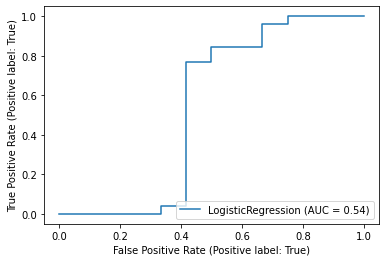

In [470]:
RocCurveDisplay.from_estimator(logreg, data1.iloc[:,:-1], data1["cancer"])